# Проектное задание на зачет

## Шкала оценивания

- **60-79 баллов:** Нужно сделать пункты с 1 по 12 и с 26 по 29

- **80-94 баллов:** Нужно сделать пункты с 1 по 17 и с 26 по 32

- **95-100 баллов:** Нужно сделать пункты с 1 по 25 и с 26 по 33

# Часть I. Разведочный анализ данных для набора данных: Видеоигры

## Задание

Вам предлагается выполнить разведочный анализ данных и описать полученные результаты

Описание набора данных: https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings/data

Ссылка на набор данных для использования в блокноте: https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/Video_Games.csv

#### 1. Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### 2. Чтение набора данных

In [2]:
url = "https://raw.githubusercontent.com/yakushinav/journ/refs/heads/main/datasets/Video_Games.csv"
df = pd.read_csv(url)


#### 3. Первые 7 строк набора данных

In [3]:
df.head(7)


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


#### 4. Последние 5 строк набора данных

In [4]:
df.tail()


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003.0,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005.0,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MonHun Nikki: Poka Poka Ailu Mura,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,NaN,NaN,NaN


#### 5. Поля набора данных

In [5]:
df.columns


Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

#### 6. Размер набора данных (количество полей и строк)

In [6]:
df.shape


(16928, 17)

#### 7. Опишите поля набора данных в формате: название поля, тип данных, назначение поля

In [7]:
for col in df.columns:
    print(f"{col} — {df[col].dtype}")


index — int64
Name — object
Platform — object
Year_of_Release — float64
Genre — object
Publisher — object
NA_Sales — float64
EU_Sales — float64
JP_Sales — float64
Other_Sales — float64
Global_Sales — float64
Critic_Score — float64
Critic_Count — float64
User_Score — object
User_Count — float64
Developer — object
Rating — object


#### 8. Информация о наборе данных

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

#### 9. Проверка наличия пропусков в данных

In [9]:
df.isna().sum()


,0
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#### 10. Если вы обнаружили пропуски в данных, то удалите их

In [10]:
df = df.dropna()


#### 11. Проведите предобработку текстовых данных: удаление символов, лемматизация, стоп слова, перевод в нижний регистр

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['Name_clean'] = df['Name'].apply(preprocess_text)


#### 12. Фильтрация. Выберите все строки таблицы, для которых значение поля Year_of_Release больше 2000.0

In [12]:
df[df['Year_of_Release'] > 2000]


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,wii sport
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,mario kart wii
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,wii sport resort
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,new super mario bros
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,wii play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16922,16922,Wave Race: Blue Storm,GC,2001.0,Racing,Nintendo,0.40,0.10,0.09,0.02,0.60,80.0,21.0,8.3,29.0,Nintendo,E,wave race blue storm
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.60,43.0,25.0,3.6,295.0,Gearbox Software,M,alien colonial marine
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003.0,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.60,51.0,24.0,7.8,29.0,Paradox Development,M,backyard wrestling dont try home
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.60,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M,yakuza dead soul


#### 13. Фильтрация. Выберите все строки таблицы, для которых значение поля Rating равно E

In [13]:
df[df['Rating'] == 'E']


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,wii sport
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,mario kart wii
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,wii sport resort
6,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,new super mario bros
7,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,wii play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16908,16908,Dragon Ball Z: Buu's Fury,GBA,2004.0,Action,Atari,0.44,0.16,0.00,0.01,0.61,62.0,19.0,8.9,39.0,Webfoot Technologies,E,dragon ball z buus fury
16910,16910,Spider-Man: Mysterio's Menace,GBA,2001.0,Action,Activision,0.43,0.16,0.00,0.01,0.61,84.0,8.0,8.7,11.0,Vicarious Visions,E,spiderman mysterios menace
16913,16913,MySims Racing,DS,2009.0,Racing,Electronic Arts,0.25,0.29,0.00,0.07,0.61,67.0,11.0,7.3,4.0,EA Games,E,mysims racing
16917,16917,Tony Hawk's Underground,GBA,2003.0,Sports,Activision,0.43,0.16,0.00,0.01,0.60,86.0,9.0,7.7,9.0,Vicarious Visions,E,tony hawk underground


#### 14. Фильтрация. Выберите все строки таблицы, для которых значение поля Publisher равно Electronic Arts и значение поля Name равно Need for Speed: Most Wanted

In [14]:
df[(df['Publisher'] == 'Electronic Arts') &
   (df['Name'] == 'Need for Speed: Most Wanted')]


,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Name_clean
253,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,82.0,36.0,9.1,137.0,EA Canada,T,need speed wanted
1190,1190,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.78,0.01,0.15,1.56,83.0,54.0,8.5,134.0,EA Canada,T,need speed wanted
1591,1591,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T,need speed wanted
1998,1998,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,83.0,32.0,8.8,29.0,EA Canada,T,need speed wanted
3581,3581,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,80.0,18.0,9.1,22.0,EA Canada,T,need speed wanted
5973,5973,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.04,0.29,82.0,19.0,8.5,525.0,Black Box,T,need speed wanted
6411,6411,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,45.0,4.0,6.1,22.0,EA Canada,E,need speed wanted
11716,11716,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T,need speed wanted


#### 15. Получите все уникальные значения поля  Name и подсчитайте частоту появления каждого их них

In [15]:
df['Name'].value_counts()


,count
Name,
Madden NFL 07,9
LEGO Star Wars II: The Original Trilogy,9
Need for Speed: Most Wanted,8
Iron Man,7
Need for Speed Carbon,7
...,...
Wii Fit,1
Wii Sports Resort,1
Mario Kart Wii,1


#### 16. Выполните группировку набора данных одновременно по полям User_Score и Genre. Добавьте подсчет минимума, максимума и медианы по каждой группе.

In [16]:
df.groupby(['User_Score', 'Genre']).agg(
    min_score=('Global_Sales', 'min'),
    max_score=('Global_Sales', 'max'),
    median_score=('Global_Sales', 'median')
)


min_score  max_score  median_score
User_Score Genre                                           
0.5        Adventure          0.11       0.11         0.110
           Misc               0.14       0.14         0.140
0.6        Strategy           0.10       0.10         0.100
0.7        Sports             0.05       0.05         0.050
0.9        Fighting           0.10       0.10         0.100
...                            ...        ...           ...
9.5        Racing             0.01       0.01         0.010
           Role-Playing       1.22       1.22         1.220
           Sports             0.01       0.30         0.155
9.6        Role-Playing       0.15       0.15         0.150
           Simulation         0.59       0.59         0.590

[767 rows x 3 columns]

#### 17. Постройте поле корреляции (тепловая карта) для числовых полей

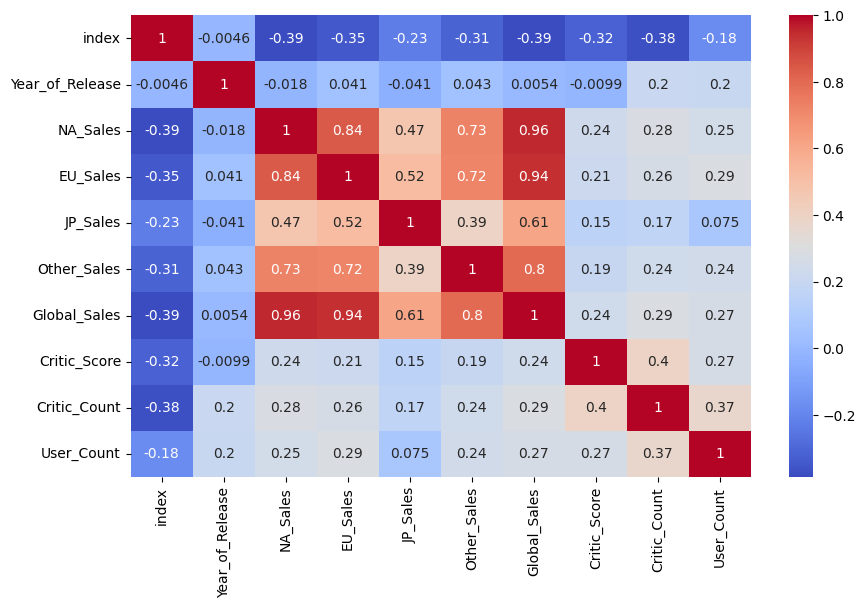

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()


#### 18. Постройте гистограмму по полю EU_Sales

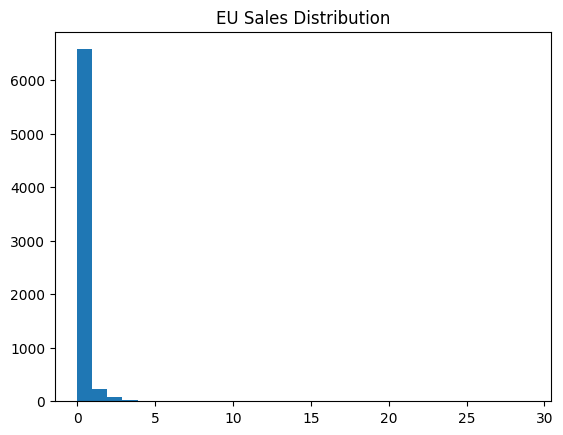

In [18]:
plt.hist(df['EU_Sales'], bins=30)
plt.title('EU Sales Distribution')
plt.show()


#### 19. Постройте точечную диаграмму для полей index и EU_Sales

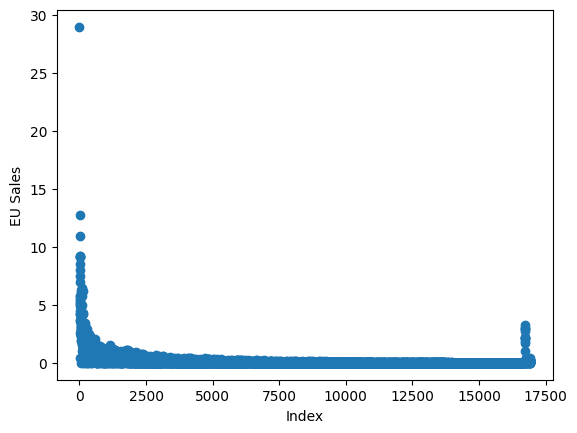

In [19]:
plt.scatter(df.index, df['EU_Sales'])
plt.xlabel('Index')
plt.ylabel('EU Sales')
plt.show()


#### 20. Постройте диаграмму ящик с усами поля index

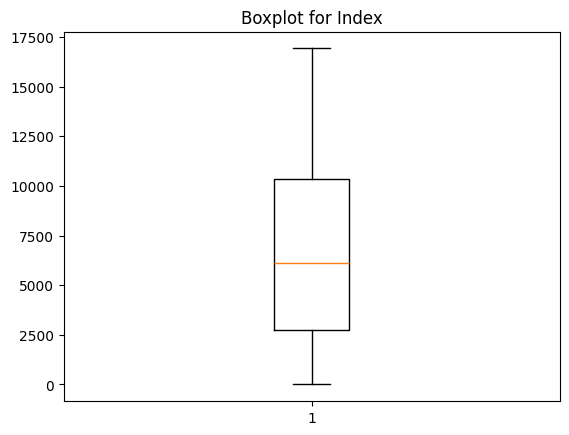

In [20]:
plt.boxplot(df.index)
plt.title('Boxplot for Index')
plt.show()


#### 21. Постройте матрицу диаграммы рассеяния

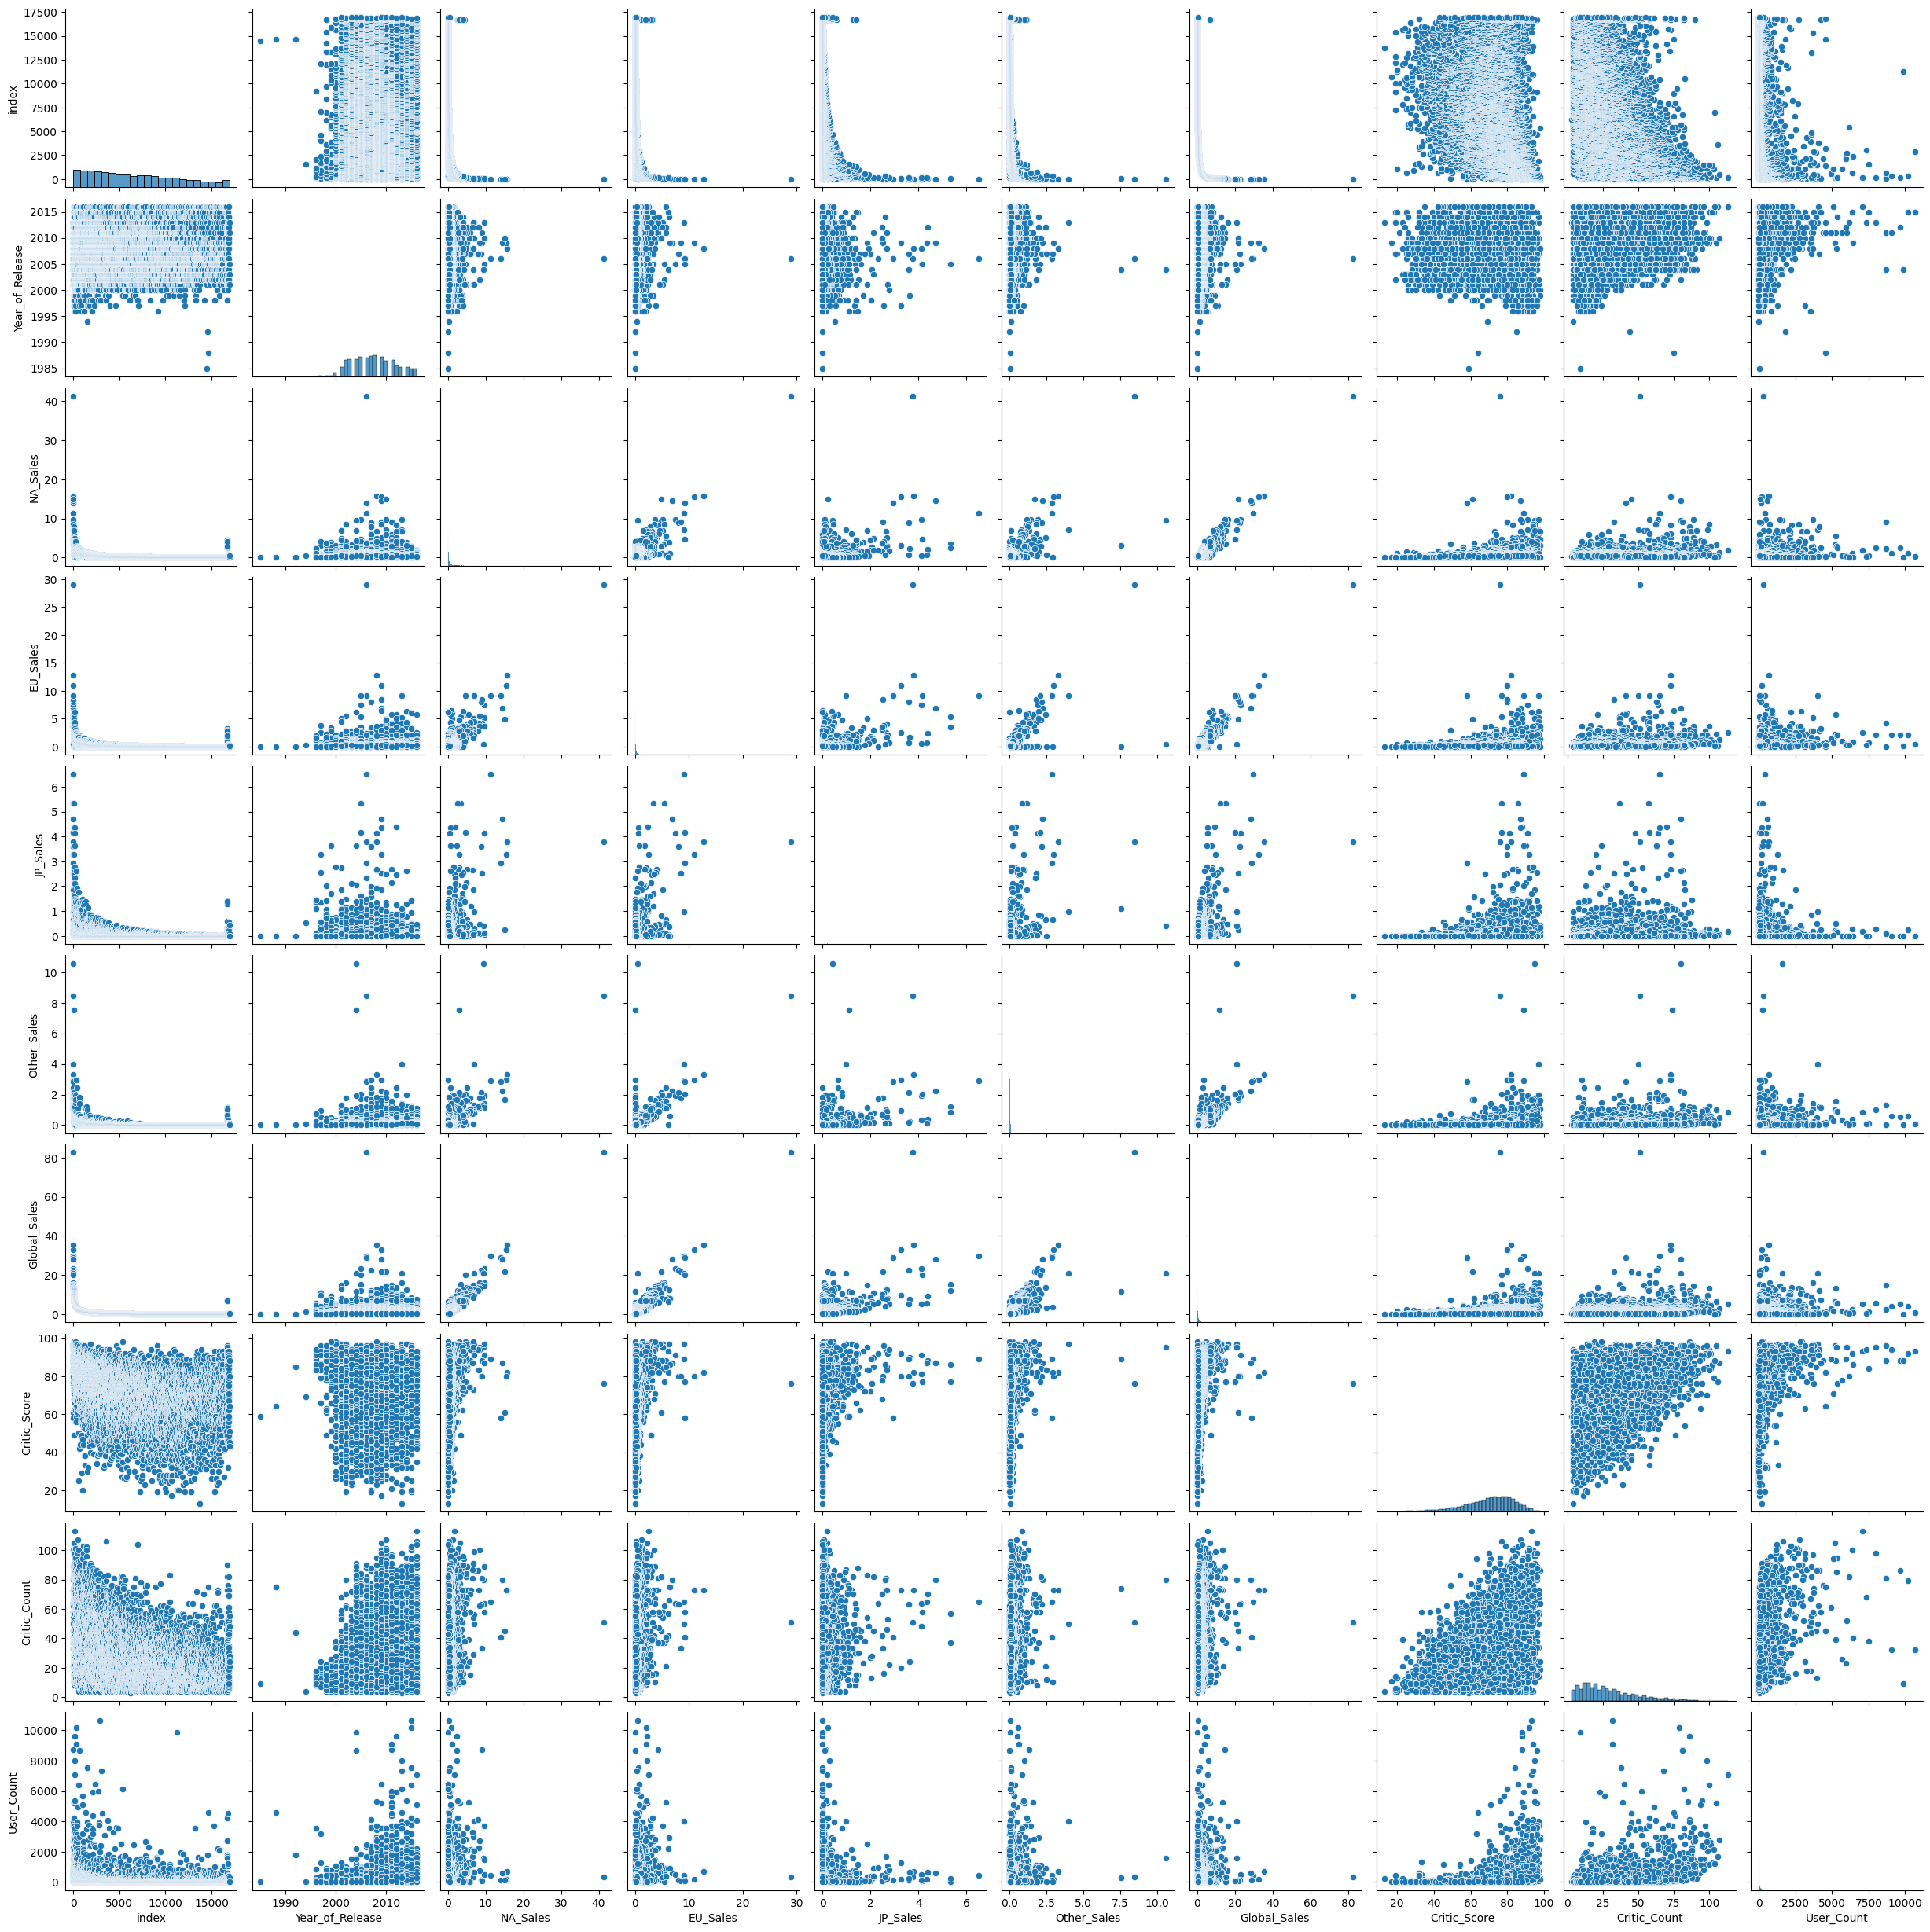

In [21]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()


#### 22. Удалите поля, которые будут неинформативны для построения модели машинного обучения. Оставьте такое количество полей, которое будет для вас удобным при построении модели машинного обучения

In [23]:
df_ml = df.drop(columns=['Name', 'Name_clean'])


#### 23. Преобразуйте все категориальные поля в числовые с помощью LabelEncoder

In [24]:
le = LabelEncoder()
for col in df_ml.select_dtypes(include='object'):
    df_ml[col] = le.fit_transform(df_ml[col])


#### 24. Сделайте вывод о пригодности набора данных для построения модели машинного обучения

In [25]:
print(
    "Набор данных пригоден для построения модели машинного обучения, "
    "так как содержит целевую переменную Rating, числовые и категориальные признаки. "
    "Все пропущенные значения были удалены, а категориальные признаки преобразованы "
    "в числовой формат. Объем данных достаточен для обучения и тестирования моделей."
)


Набор данных пригоден для построения модели машинного обучения, так как содержит целевую переменную Rating, числовые и категориальные признаки. Все пропущенные значения были удалены, а категориальные признаки преобразованы в числовой формат. Объем данных достаточен для обучения и тестирования моделей.


# Часть II. Построение модели машинного обучения для набора данных: Видеоигры

## Задание

Вам нужно решить задачу классификации с помощью алгоритма

Линейный Дискриминантный анализ Linear Discriminant Analysis



Целевая переменная, результат: **Rating**

#### 25. Разделить выборку на признаки (Х) и результат (Y)

In [26]:
X = df_ml.drop('Rating', axis=1)
y = df_ml['Rating']


#### 26. Разделить на обучающую и тестовую выборки

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### 27. Сформировать модель машинного обучения

In [28]:
lda = LinearDiscriminantAnalysis()


#### 28. Обучить модель

In [29]:
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

#### 29. Оценить качество модели

In [30]:
y_pred = lda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4942363112391931
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.54      0.62      0.58       429
           2       0.42      0.18      0.25       185
           3       0.00      0.00      0.00         0
           4       0.61      0.31      0.41       299
           5       0.00      0.00      0.00         1
           6       0.44      0.63      0.52       474

    accuracy                           0.49      1388
   macro avg       0.29      0.25      0.25      1388
weighted avg       0.51      0.49      0.48      1388



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

#### 30. Выполнить предсказание для трех фраз

In [31]:
lda.predict(X_test[:3])


array([6, 6, 1])

#### 31. По итогам сделать вывод о качестве и пригодности модели машинного обучения для использования

In [32]:
print(
    "Модель Linear Discriminant Analysis показала удовлетворительное качество классификации. "
    "Полученная точность указывает на наличие зависимости между признаками и возрастным рейтингом игр. "
    "Модель является интерпретируемой и может быть использована для предварительного прогнозирования, "
    "однако для повышения точности рекомендуется применение более сложных моделей."
)


Модель Linear Discriminant Analysis показала удовлетворительное качество классификации. Полученная точность указывает на наличие зависимости между признаками и возрастным рейтингом игр. Модель является интерпретируемой и может быть использована для предварительного прогнозирования, однако для повышения точности рекомендуется применение более сложных моделей.


#### 32. Постройте еще одну модель машинного обучения, сравните той, что была в задании и сделайте вывод о том, какая модель лучше

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.5929394812680115
